# Exponente(s) de Lyapunov y Universalidad

In [8]:
using Pkg
Pkg.activate("..")
Pkg.instantiate()

  Activating environment at `~/Desktop/Diego/Diego_Escuela/SelectosC/2021-2_TSelecFisComp-1/Project.toml`


In [9]:
using Plots

## Exponente de Lyapunov

Hasta ahora lo que hemos visto es que al variar el parámetro $c$, el mapeo
cuadrático exhibe una familia de bifurcaciones de doblamiento de periodo.
Eventualmente, la resolución numérica complica visualizas las cosas; la pregunta entonces
es si uno *puede* llegar a *periodo infinito* para un valor finito (y de
hecho mayor a $-2$) para el mapeo cuadrático. Periodo infinito en este caso
equivale a no tener periodo, y entonces uno se pregunta si hay un
sentido de estabilidad en órbitas genéricas, que como veremos, no lo hay,
y es lo que llamaremos *caos*. Abordaremos esta pregunta poco a poco.

Una manera de caracterizar el caos en el sentido de *sensibilidad a condiciones
iniciales* es a través de los **exponentes de Lyapunov**. La idea es sencilla:
si hay una dependencia *exponencial* respecto al tiempo de la separación de condiciones
iniciales infinitesimalmente cercanas, entonces diremos que hay sensibilidad a las
condiciones iniciales, es decir, caos.

Para esto, simplemente monitoreamos la evolución de dos condiciones iniciales
cercanas, $x_0$ y $x_0+\epsilon$, donde $\epsilon>0$ y muy pequeño.

Considerando mapeos en una dimensión, la distancia entre los $n$-ésimos
iterados es

\begin{equation}
d_n = \big|\, f^{n}(x_0+\epsilon)-f^{n}(x_0) \big|\,.
\end{equation}

Entonces, suponiendo que $d_n$ tiene una dependencia exponencial de $n$
(tiempo discreto), para $n\to\infty$ y $\epsilon\to 0$, escribimos
$d_n= \epsilon \exp(\lambda n)$, de donde obtenemos

\begin{equation}
\lambda(x_0) \equiv \lim_{n\to\infty} \;\lim_{\epsilon\to 0} \;
\frac{1}{n}\log\Big| \frac{f^{n}(x_0+\epsilon)-f^{n}(x_0)}{\epsilon}\Big|.
\end{equation}

A $\lambda(x_0)$ le llamamos el exponente de Lyapunov. Si $\lambda(x_0)>0$
diremos que hay caos, mientras que si $\lambda(x_0)<0$ diremos que no lo hay.

Observaciones:

- El exponente de Lyapunov, estrictamente hablando, depende de la condición
inicial $x_0$.
- En la definición del exponente de Lyapunov se require la evaluación
de **dos** límites, uno que involucra al tiempo ($n\to\infty$), y otro que
representa la distancia entre las condiciones iniciales ($\epsilon\to 0$).
- La definición del exponente de Lyapunov es sutil, ya que en muchas
ocasiones *sabemos* que el rango de $f(x)$ es acotado cuando $x$ está
en cierto dominio, lo que entonces podría llevar erróneamente a concluir
que $\lambda(x_0)=0$. La sutileza está evidentemente en el órden de los
límites, que no necesariamente conmuta.
- Las unidades del exponente de Lyapunov corresponden al inverso del tiempo, es
decir, $\lambda^{-1}$ describe una escala relevante del tiempo para la dinámica.

Si el mapeo $f(x)$ es suficientemente suave, entonces podemos escribir

\begin{equation}
\lambda(x_0) = \lim_{n\to\infty} \frac{1}{n}\log\Big| \frac{{\rm d} f^{n}}{{\rm d}x}(x_0)\Big|,
\end{equation}

donde literalmente hemos usado la definición de la derivada de la función $f^{n}$.
Dado que para mapeos se cumple

\begin{equation}
\frac{{\rm d}f^n}{{\rm d}x}(x_0) = f'(x_0) f'(x_1)\dots f'(x_{n-1}) = \prod_{i=0}^{n-1} f'(x_i),
\end{equation}

donde $x_i=f^i(x_0)$, es decir, $x_i$ es el i-ésimo iterado de $x_0$, obtenemos

\begin{equation}
\lambda(x_0) = \lim_{n\to\infty} \frac{1}{n} \sum_{i=0}^{n-1} \log\Big| \, f'(x_i)\, \Big|.
\end{equation}

#### Ejercicio 1

- ¿Cómo se generaliza la expresión anterior para el exponente de Lyapunov que se definió
para mapeos de 1 variable, a mapeos de 2 variables?

- ¿Cómo se compara el exponente de Lyapunov $\lambda(x_0)$ con $\lambda( f(x_0) )$,
para el mapeo $x\mapsto f(x)$?

In [ ]:
#(Respuestas)

## Universalidad

Anteriormente generamos el siguiente diagrama de bifurcaciones de la familia cuadrática:

![Diag. bifurcaciones](diag_bif1.png)

En esta sección, analizaremos por qué ciertos aspectos de la dinámica son
universales, como por ejemplo los exponentes de Feigenbaum, es decir, por qué
se obtienen *los mismos resultados* para una familia más amplia de mapeos,
más allá de la cuadrática.

El argumento que se presenta será más bien cualitativo; sin embargo, las
observaciones que aquí se harán se pueden poner en términos rigurosos, que
se conocen como la teoría de renormalización.

### Ciclos superestables

Para la familia de mapeos cuadráticos $Q_c(x) = x^2+c$, un punto particular
es $x=0$, simplemente porque en $x=0$ se satisface $Q_c'(x=0)=0$ para todo
valor de $c$. Si bien esta observación es trivial, tener
que la derivada en un punto de una órbita periódica se anula implica que dicha
órbita, en términos de su estabilidad, está lo más alejada posible de -1 o 1,
que son los puntos de posibles bifurcaciones. Por esto es que definiremos un
*ciclo superestable* de periodo $n$ como aquél en que el punto $x=0$ forma
parte del órbita periódica de periodo $n$, lo que es equivalente a pedir
que la derivada del ciclo estable sea cero.

Es fácil ver que en $c_0=0$ se tiene un ciclo superestable periódico de
periodo 1 (ver por ejemplo el diagrama de bifurcaciones). En este caso, uno
puede sustituir $c=0$ en $Q_c(x)$, y verificar que $Q_{c=0}(x)=x$ se cumple
para $x=0$.

In [10]:
"Mapeo cuadrático evaluado en `x`, con parámetro `c`"
Qc(x,c) = x^2 + c

Qc(x, args...) = Qc(x, args[1])

Qc (generic function with 2 methods)

In [11]:
"Derivada de `Qc(x,c)` respecto a `x` evaluada en `x`, con parámetro `c`"
Qc´(x,c) = 2x

Qc´

In [12]:
C0 = 0.0

Qc(0.0,C0) == 0.0

true

In [13]:
"""
    Qcⁿ(x, args)

Esta función regresa el n-enésimo iterado de ``Q_c(x,c)``,
donde el valor a iterar es `x` y el valor del parámetro
es `c`, donde `c = args[1]` y `n = args[2]`.
"""
function Qcⁿ(x, args)
    c, n = args[1], args[2]
    n <= 1 && return Qc(x,c)
    for it = 1:n
        x = Qc(x,c)
    end
    return x
end

Qcⁿ

La siguiente gráfica muestra el mapeo $Q_c(x)$ para $c=c_0$.

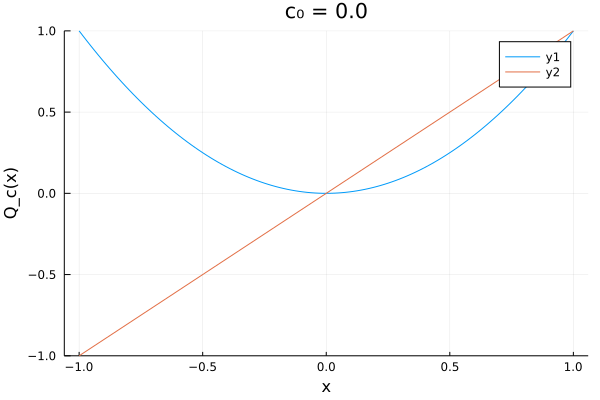

In [14]:
xrange = -1:1/64:1
plot(xrange, x->Qcⁿ(x, (C0,1)))
plot!(xrange, x->x)
ylims!(-1,1)
xlabel!("x")
ylabel!("Q_c(x)")
title!("c₀ = $C0")

Para obtener el valor $c_1$ del ciclo superestable de periodo 2, debemos
encontrar la $c$ tal que

\begin{equation}
Q_c^2(0) = c^2+c = c(c+1) = 0,
\end{equation}

cuya solución (distinta de $c_0=0$) es $c_1=-1$.

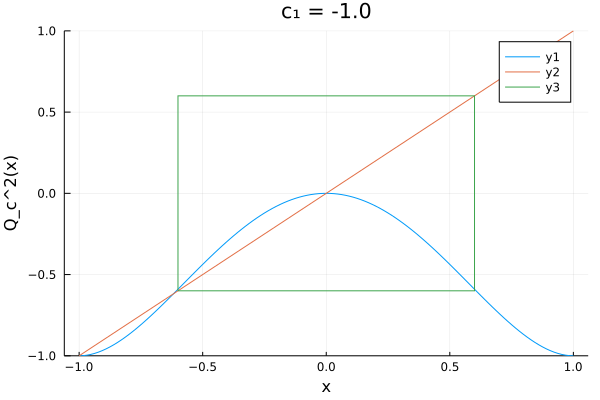

In [15]:
C1 = -1.0

xrange = -1:1/64:1
plot(xrange, x->Qcⁿ(x, (C1,2)))
plot!(xrange, x->x)
ylims!(-1,1)

x₁ = -0.6
plot!([x₁, -x₁, -x₁, x₁, x₁], [x₁, x₁, -x₁, -x₁, x₁])
xlabel!("x")
ylabel!("Q_c^2(x)")
title!("c₁ = $C1")

El recuadro en la gráfica de $C_1$ muestra un detalle de $Q_{C_1}^2(x)$
que, localmente, se *parece* a $Q_{C_0}(x)$; aunque obvio de la gráfica,
noten que la comparación requiere de una reflexión.

In [35]:
using TaylorSeries

function roots_newton(f, x0)
    t = Taylor1(eltype(x0), 1)   # Define una variable tipo `Taylor1` de orden 1
    #Se implementan 30 iterados del método de Newton
    for ind = 1:50
        #`fT` equivale al desarrollo de Taylor de `f`, de orden 1
        fT = f(x0+t)
        #`fT[0]` y `fT[1]` son el coeficiente de orden 0 y 1 de la serie `fT`
        x0 = x0 - fT[0]/fT[1]
    end
    return x0
end

roots_newton (generic function with 1 method)

In [36]:
Q4c = c -> Qcⁿ(0.0, (c, 4))
C2 = roots_newton(Q4c, -1.4)

-1.3107026413368328

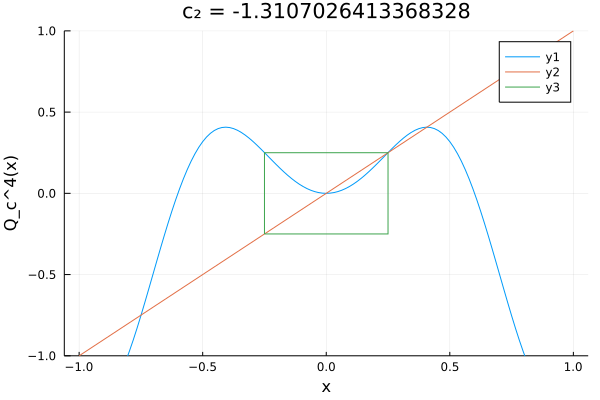

In [37]:
xrange = -1:1/64:1
plot(xrange, x->Qcⁿ(x, (C2,4)))
plot!(xrange, x->x)
ylims!(-1,1)

x₁ = -0.25
plot!([x₁, -x₁, -x₁, x₁, x₁], [x₁, x₁, -x₁, -x₁, x₁])

xlabel!("x")
ylabel!("Q_c^4(x)")
title!("c₂ = $C2")

Nuevamente, el recuadro en la gráfica de $c_2$ muestra un detalle de
$Q_{c_2}^4(x)$ que, localmente, se *parece* a $Q_{c_0}(x)$. En este caso,
la comparación con el diagrama original es directa, o una doble reflexión
corresponde a la identidad.

In [38]:
Q8c = c -> Qcⁿ(0.0, (c, 8))
C3 = roots_newton(Q8c, -1.4)

-1.3815474844320617

In [42]:
Q32c = c -> Qcⁿ(0.0, (c, 32))
C3 = roots_newton(Q32c, -1.4)

-1.4002530812147829

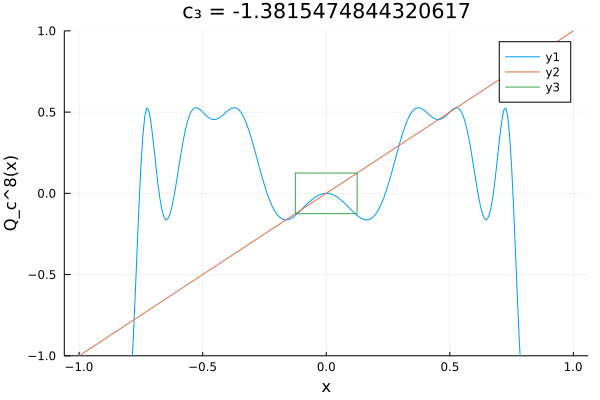

In [39]:
xrange = -1:1/128:1
plot(xrange, x->Qcⁿ(x, (C3,8)))
plot!(xrange, x->x)
ylims!(-1,1)

x₁ = -0.125
plot!([x₁, -x₁, -x₁, x₁, x₁], [x₁, x₁, -x₁, -x₁, x₁])

xlabel!("x")
ylabel!("Q_c^8(x)")
title!("c₃ = $C3")

#### Ejercicio 1

Comparar gráficamente los mapeos $Q_{c}(x)$ y $Q_{c^\prime}^2(x)$ para
$c=1/4, 0, -3/4, -1, -2, -2.2$ y $c^\prime=-3/4,-1,-5/4,-1.3, -1.546\dots, -1.65$.

In [ ]:
#(Respuesta)

### Constante $\alpha$ de Feigenbaum

El punto del análisis gráfico anterior es que, *localmente*, los mapeos
$Q_{c_0}(x)$ y $Q^{2^n}_{c_n}(x)$ son muy similares, si uno se enfoca en
un dominio muy particular para $Q^{2^n}_{c_n}(x)$.

Vale la pena notar que, en este caso, la distancia al punto fijo (que cruza
la identidad) y que define los recuadros, es
$d_n = Q_{c_n}^{2^{n-1}}(0)\approx -\alpha d_{n+1}$.

Esta observación se expresa de manera formal construyendo una función que
localmente se comporta como $Q^{2^n}_{c_n}(x)$, esto es:

\begin{equation}
g_1(x) = \lim_{n\to\infty} (-\alpha)^n Q_{c_{n+1}}^{2^n}\;\Big(\frac{x}{(-\alpha)^n}\Big).
\end{equation}

El límite $n\to\infty$ hace que todas las particularidades del mapeo $Q_c(x)$
se pierdan y, en este sentido, que sólo resten las propiedades que son *universales*.

La ecuación anterior se generaliza a:

\begin{equation}
g_i(x) = \lim_{n\to\infty} (-\alpha)^n Q_{c_{n+i}}^{2^n}\;\Big(\frac{x}{(-\alpha)^n}\Big),
\end{equation}

De la definición de $g_i(x)$, uno puede demostrar que las funciones $g_i(x)$
satisfacen la ecuación

\begin{equation}
g_{i-1}(x) = -\alpha g_i\Big( g_i\big(-\,\frac{x}{\alpha}\big)\Big) .
\end{equation}

Al tomar el límite $i\to \infty$ nos lleva a:

\begin{equation}
g(x) \equiv T g(x) = -\alpha g\Big( g\big(-\,\frac{x}{\alpha}\big)\Big),
\end{equation}

donde $T$ es el *operador de doblamiento de periodo*.

Si una función $g(x)$ satisface la ecuación anterior, entonces la función
$\mu g(x/\mu)$, con $\mu\neq 0$, es también solución de la ecuación. Esta
es una propiedad de escalamiento. De aquí, imponiendo que $g(0)=1$ se
tiene $1=-\alpha g(1)$.

La idea es hacer un desarrollo en serie de Taylor de $g(x)$ cerca de $x=0$
a fin de obtener una aproximación de $\alpha$. De la ecuación de doblamiento
de periodo uno obtiene:

\begin{eqnarray}
g'(x) &=& g'\Big( g\big(-\,\frac{x}{\alpha}\big) \Big) g'\big(-\,\frac{x}{\alpha}\big),\\
g''(x) &=& -g''\Big( g\big(-\,\frac{x}{\alpha}\big) \Big) \Big[ g'\big(-\,\frac{x}{\alpha}\big)\Big]^2
-\,\frac{1}{\alpha} g'\Big( g\big(-\,\frac{x}{\alpha}\big) \Big) g''\big(-\,\frac{x}{\alpha}\big).
\end{eqnarray}

De la primer ecuación podemos concluir que $g'(0)=0$. Por esto, a segundo
orden tenemos que $g(x)\simeq 1+b x^2$. Sustituyendo esta aproximación en la
ecuación de doblamiento de periodo y desarrollando *hasta* segundo orden,
se obtiene:

\begin{equation}
1+b x^2 \simeq -\alpha\Big(1+b\big(1+b(-\frac{x}{\alpha})^2\big)^2\Big) = -\alpha\Big( 1+ b + \frac{2b^2}{\alpha^2}x^2\Big) + {\cal O}(x^4).
\end{equation}

Igualando término a término (potencias de $x$) tenemos que se debe satisfacer:

\begin{eqnarray}
1 &=& -\alpha(1 + b),\\
b &=& - 2b^2/\alpha.\\
\end{eqnarray}

De aquí finalmente obtenemos $b \approx -\alpha/2$ y
$\alpha\approx 1+\sqrt{3}=2.73\dots$; el valor de
esta constante es $\alpha = 2.502907\dots$.

La otra constante de Feigenbaum se obtiene estudiando las propiedades de la
ecuación linearizada en $c$.

## Referencia

Heinz Georg Schuster, Wolfram Just, Deterministic Chaos, 2006.

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*